# Sameer Gupta

## Section 1: Loading and processing the data

In this section you will load the data from the file `UCI_Credit_Card.csv` and process it appropriately. You will also perform the train-test split in this section. The train-test split we want you to use is 80% for training and 20% for testing.

First I imported all the required packages to run my program.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from sklearn.utils import shuffle

Using TensorFlow backend.


We'll now import the CSV file with our data. I parsed all the data values from our dataset. Then with trial and error I choose the best features represented the data and dropped around 13 data values. 

In [2]:
file_name = 'UCI_Credit_card.csv'

columns = [
    'ID',
    'LIMIT_BAL',
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'AGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
    'default.payment.next.month'
]

df = pd.read_csv(file_name,names=columns,delimiter=',',header=-1)
df = df.drop(df.columns[[0,2,4,9,10,11,15,16,17,21,22,23]], axis=1)
df.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default.payment.next.month
0,20000.0,2,24,2,2,-1,3913.0,3102.0,689.0,0.0,689.0,0.0,1
1,120000.0,2,26,-1,2,0,2682.0,1725.0,2682.0,0.0,1000.0,1000.0,1
2,90000.0,2,34,0,0,0,29239.0,14027.0,13559.0,1518.0,1500.0,1000.0,0
3,50000.0,2,37,0,0,0,46990.0,48233.0,49291.0,2000.0,2019.0,1200.0,0
4,50000.0,2,57,-1,0,-1,8617.0,5670.0,35835.0,2000.0,36681.0,10000.0,0


Here is a peak into the dataset and the selected features, now using a simple formula we will normalize our dataset. 

In [3]:
for feature in df.columns[:-1]:
    max_value = df[feature].max()
    min_value = df[feature].min()
    mean_value = df[feature].mean()
    df[feature] = (df[feature] - mean_value)/(max_value - min_value)    

Below is our normalized dataframe. As you can see every value in the data is normalized between -1 and 1. This applies to all except the last column representing whether the person defaulted on their credit score. 

In [4]:
df.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default.payment.next.month
0,-0.148974,0.024478,-0.198026,0.20167,0.213377,-0.08338,-0.041864,-0.043729,-0.025434,-0.006483,-0.003107,-0.005832,1
1,-0.047964,0.024478,-0.163543,-0.09833,0.213377,0.01662,-0.042953,-0.045035,-0.024340,-0.006483,-0.002922,-0.004716,1
2,-0.078267,0.024478,-0.025612,0.00167,0.013377,0.01662,-0.019454,-0.033360,-0.018368,-0.004746,-0.002625,-0.004716,0
3,-0.118671,0.024478,0.026112,0.00167,0.013377,0.01662,-0.003746,-0.000898,0.001251,-0.004194,-0.002317,-0.004493,0
4,-0.118671,0.024478,0.370940,-0.09833,0.013377,-0.08338,-0.037702,-0.041291,-0.006137,-0.004194,0.018263,0.005328,0


Now we will intialize our class representing our data and the respected YES-NO values for the dataframe as labels. 

In [5]:
class creditScore:
    def __init__(self,features,label):
        self.features = features
        self.label = label

In [6]:
data = []
for row in df.itertuples():
    label = row[13]
    features = row[1:13]
    credit = creditScore(features,label)
    data.append(credit)

Here we test/train split at 80% for training and 20% for testing the data.

In [7]:
data = shuffle(data)
split_index = int(0.8*len(data))
train = data[:split_index]
test = data[split_index:]

X_train = np.array([example.features for example in train])
Y_train = np.array([example.label for example in train])
X_test = np.array([example.features for example in test])
Y_test = np.array([example.label for example in test])

print('Total Examples: {:}\nTrain Examples: {:}\nTest Examples: {:4d}'.format(len(data), len(X_train), len(X_test)))

Total Examples: 30000
Train Examples: 24000
Test Examples: 6000


## Section 2: Building the model

In this section you will write all the code to build your model in Keras. The model should output a single number between 0 and 1 which is the probability which represents whether the individual will default or not.

Now we will use a sequential model for dataframe. We have 11 input values and one YES/NO output value which is represented by the sigmoid(confidence) function. Again the number of nodes in each layer(except the output layer)was selected by trial and error. The trend I saw was that when we increase the number of nodes in each layer, the accurary of model increases, which makes sense because the the dataframe has a large number of features(11). 

In [8]:
model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Section 3: Training the model

In this section you will write all the coded needed to train your model on the data from Section 0. Make sure you **dont** train the model on the data you will test on!

Now we will test our data using the data we had set aside for testing. We will run the model 20 times over our dataframe. We reduced the batch size so it runs the test data 10 at a time. 

In [10]:
model.fit(X_train, Y_train, epochs=20, batch_size=10)

Epoch 1/20
24000/24000 [==============================] - 4s 179us/step - loss: 0.4680 - acc: 0.8049
Epoch 2/20
24000/24000 [==============================] - 4s 160us/step - loss: 0.4473 - acc: 0.8160
Epoch 3/20
24000/24000 [==============================] - 4s 162us/step - loss: 0.4440 - acc: 0.8172
Epoch 4/20
24000/24000 [==============================] - 4s 162us/step - loss: 0.4416 - acc: 0.8187
Epoch 5/20
24000/24000 [==============================] - 4s 167us/step - loss: 0.4401 - acc: 0.8184
Epoch 6/20
24000/24000 [==============================] - 4s 161us/step - loss: 0.4388 - acc: 0.8188
Epoch 7/20
24000/24000 [==============================] - 4s 162us/step - loss: 0.4382 - acc: 0.8196
Epoch 8/20
24000/24000 [==============================] - 4s 162us/step - loss: 0.4375 - acc: 0.8190
Epoch 9/20
24000/24000 [==============================] - 4s 161us/step - loss: 0.4368 - acc: 0.8185
Epoch 10/20
24000/24000 [==============================] - 4s 161us/step - loss: 0.4364 - a

## Section 4: Testing the model and results

In this section you will compute the accuracy of your model on the test data from Section 0. Make sure you very clearly have a cell that outputs and prints the percentage accuracy of your model. You will also include any code used to analyze the results here.

In [11]:
score = model.evaluate(X_test,Y_test,verbose=False)
print("Accurary: %.4f%%" %(score[1]*100))

Accurary: 82.2167%


In [12]:
history = model.fit(X_train,Y_train,validation_split=0.33,epochs=100,batch_size=10,verbose=10)
print(history.history.keys())

Train on 16079 samples, validate on 7921 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/10

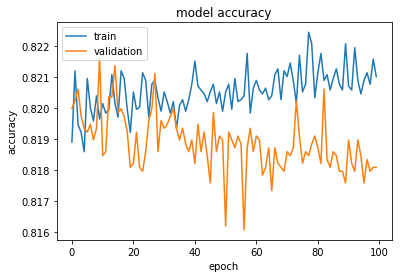

In [13]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

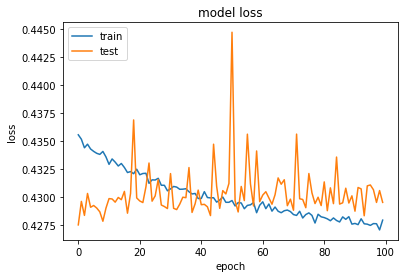

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()